### **Bootcamp Machine Learning**

**DESAFIO DO MODULO 2 - Modelos Preditivos Séries Temporais**

In [21]:
#Importação de bibliotecas e métodos
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.preprocessing import MinMaxScaler #método para preprocessamento de dados, alterando a escala dos mesmos
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt #lib para criar graficos comuns ao estilo matlab
import seaborn as sns #biblioteca utilizada para os plots mais bonitos
from sklearn import metrics #biblioteca com as ferramentos de medição de desempenho

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
#Upload do arquivo dataset
uploader = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [0]:
#Atribuição do do dataset à um dataframe
dataset_wine = pd.read_csv("winequality-red.csv", sep=';')

Estudo do dataset

In [5]:
dataset_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
dataset_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [44]:
dataset_wine.shape

(1599, 12)

In [7]:
dataset_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


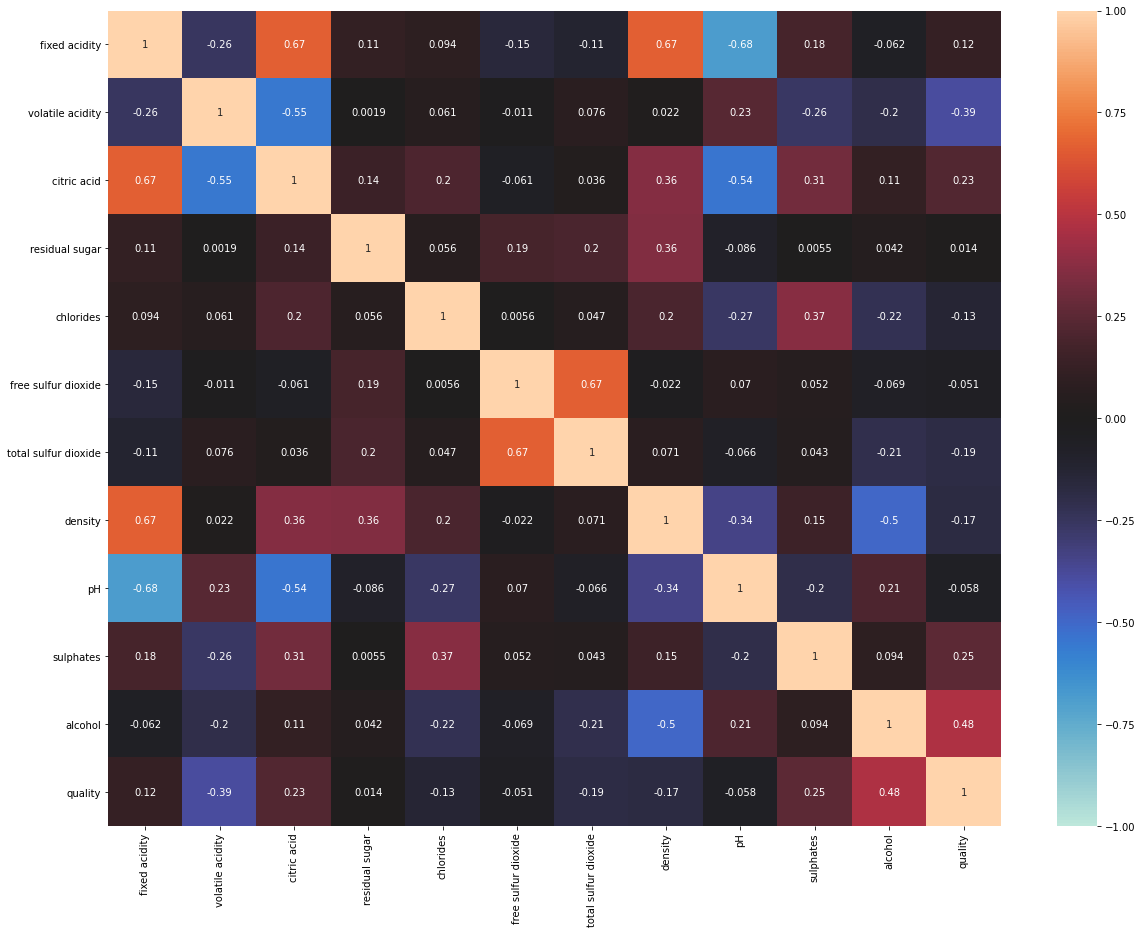

In [51]:
plt.figure(figsize=(20, 15))
sns.heatmap(dataset_wine.corr(method='pearson'), annot=True,vmin=-1, vmax=1,center= 0)
plt.show()

In [63]:
dataset_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

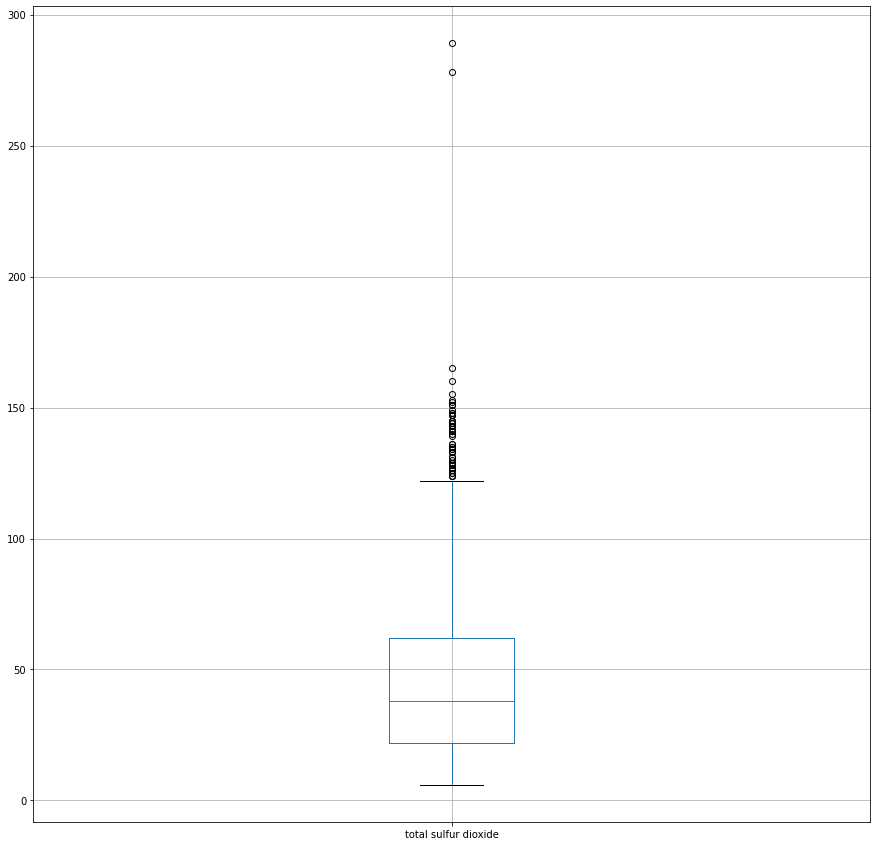

In [14]:
dataset_wine.boxplot(column='total sulfur dioxide',figsize=(15,15))

Aplicando normalização com o MinMaxScaler

In [0]:
scaler = MinMaxScaler()
scaler.fit(dataset_wine)
dataset_wine_scaled = scaler.fit_transform(dataset_wine.drop(columns='quality'))
dataset_wine_scaled = pd.DataFrame(dataset_wine_scaled, columns=['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide'	,'density',	'pH',	'sulphates',	'alcohol'])


In [80]:
dataset_wine_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


In [81]:
dataset_wine_scaled['fixed acidity'].min()

0.0

Separação dos dados entre teste e validação

In [0]:
X = dataset_wine_scaled
y = dataset_wine['quality']

In [89]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [0]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state = 1)

Treinamento de modelos

Algoritmo KNN

In [152]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)
prediction_KNN = clf_KNN.predict(X_validation)
print("A acurária do modelo é: {}" .format(metrics.accuracy_score(y_validation, prediction_KNN)))

A acurária do modelo é: 0.5645833333333333


Algoritmo Árvore de Decisão

In [153]:
from sklearn.tree import DecisionTreeClassifier
clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(X_train, y_train)
prediction_arvore = clf_arvore.predict(X_validation)
print("A acurária do modelo é: {}" .format(metrics.accuracy_score(y_validation, prediction_arvore)))


A acurária do modelo é: 0.6104166666666667


Algoritmo Floresta Randômica

In [154]:
from sklearn.ensemble import RandomForestClassifier
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)
prediction_floresta = clf_floresta.predict(X_validation)
print("A acurária do modelo é: {}" .format(metrics.accuracy_score(y_validation, prediction_floresta)))

A acurária do modelo é: 0.6791666666666667


Algoritmo SVM

In [155]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto',kernel='rbf')
clf_svm.fit(X_train, y_train)
prediction_svm = clf_svm.predict(X_validation)
print("A acurária do modelo é: {}" .format(metrics.accuracy_score(y_validation, prediction_svm)))

A acurária do modelo é: 0.5854166666666667


Algoritmo Rede MLP

In [160]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(alpha=1e5, hidden_layer_sizes=(5, 5), random_state=1, max_iter=500)
clf_mlp.fit(X_train, y_train)
prediction_mlp = clf_mlp.predict(X_validation)
print("A acurária do modelo é: {}" .format(metrics.accuracy_score(y_validation, prediction_mlp)))

A acurária do modelo é: 0.43125


Novo y para a última questão

In [0]:
y3 = []
y1 = [1]
y2 = [0]
for item in dataset_wine.quality:
  if item > int(5):
    y3.append(y1)
  else:
    y3.append(y2)

y_novo = np.array(y3)

In [0]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y_novo, train_size=0.7, random_state = 1)

In [163]:
from sklearn.ensemble import RandomForestClassifier
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)
prediction_floresta = clf_floresta.predict(X_validation)
print("A acurária do modelo é: {}" .format(metrics.accuracy_score(y_validation, prediction_floresta)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



A acurária do modelo é: 0.8041666666666667
